In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [201]:
df=pd.read_csv('./health_insurance_risk_dataset.csv')
df.head(3)

,policy_id,age,gender,bmi,smoker,region,annual_income,occupation,marital_status,number_of_dependents,exercise_frequency,chronic_disease,past_claims_count,credit_score,policy_tenure_years,coverage_amount,premium_amount,claim_occurred,claim_amount
0,P100000,59,Male,33.3,No,West,1080761,Salaried,Single,3,4,No,1,716,2,400000,28795,1,172010
1,P100001,49,Female,26.1,Yes,West,865752,Salaried,Single,4,6,Yes,2,522,11,200000,37715,1,21049
2,P100002,35,Male,20.9,No,East,787147,Salaried,Single,0,6,No,0,708,10,500000,25135,1,148269


# PART 1: EDA (Exploratory Data Analysis)


In [250]:
#missing values
#df.isnull().sum()
#df.describe()
df=df.iloc[:,1:]
df

,age,gender,bmi,smoker,region,annual_income,occupation,marital_status,number_of_dependents,exercise_frequency,chronic_disease,past_claims_count,credit_score,policy_tenure_years,coverage_amount,premium_amount,claim_occurred,claim_amount
0,59,Male,33.3,No,West,1080761,Salaried,Single,3,4,No,1,716,2,400000,28795,1,172010
1,49,Female,26.1,Yes,West,865752,Salaried,Single,4,6,Yes,2,522,11,200000,37715,1,21049
2,35,Male,20.9,No,East,787147,Salaried,Single,0,6,No,0,708,10,500000,25135,1,148269
3,63,Female,27.5,No,North,1081382,Salaried,Married,2,4,No,2,756,9,200000,22725,1,52861
4,28,Male,26.5,No,East,955093,Salaried,Single,4,6,No,0,323,6,400000,21575,1,151403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,53,Female,28.1,No,West,596573,Student,Married,4,4,No,1,361,2,500000,29815,0,0
9996,21,Male,25.6,No,East,926145,Retired,Single,0,1,No,1,338,6,300000,17040,0,0
9997,33,Male,24.5,Yes,West,720922,Self-Employed,Single,1,3,Yes,0,628,5,1000000,58275,1,277761
9998,57,Male,30.2,No,North,868897,Self-Employed,Married,1,0,No,0,456,13,300000,24930,1,103527


# outliers

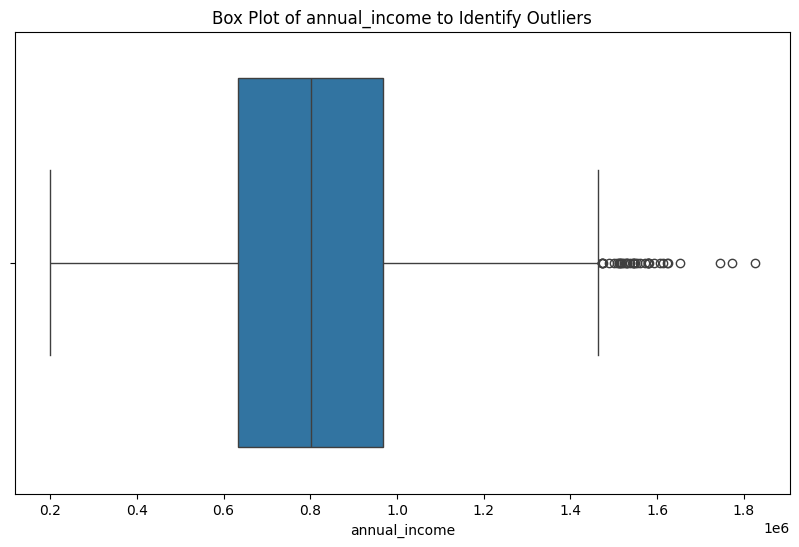

In [240]:

# 2. Select the numerical column you want to check
# For this example, let's assume the column is named 'Price'
column_name = 'annual_income'

# 3. Create the visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column_name])

# --- Understanding the Plot ---
# The 'Box': Represents the Interquartile Range (IQR), containing the middle 50% of the data.
# The 'Line' inside the box: This is the Median (the 50th percentile).
# The 'Whiskers': These extend to 1.5 times the IQR.
# The 'Dots/Diamonds': Any points beyond the whiskers are considered OUTLIERS.

plt.title(f'Box Plot of {column_name} to Identify Outliers')
plt.xlabel(column_name)
plt.show()

In [241]:


def find_all_outliers(data):
    outlier_dict = {}
    
    # Select only numerical columns (integers and floats)
    numeric_cols = data.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        # Calculate Quatiles and IQR for the specific column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the 'fences'
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify the outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        
        # Only add to dictionary if outliers actually exist
        if not outliers.empty:
            outlier_dict[col] = outliers.tolist()
            
    return outlier_dict

# Execute the function
all_outliers = find_all_outliers(df)

# Print the results
for column, values in all_outliers.items():
    print(f"Column '{column}' has {len(values)} ") 

Column 'bmi' has 49 
Column 'annual_income' has 37 
Column 'past_claims_count' has 480 
Column 'premium_amount' has 24 
Column 'claim_amount' has 381 
Column 'claim_to_premium_ratio' has 110 


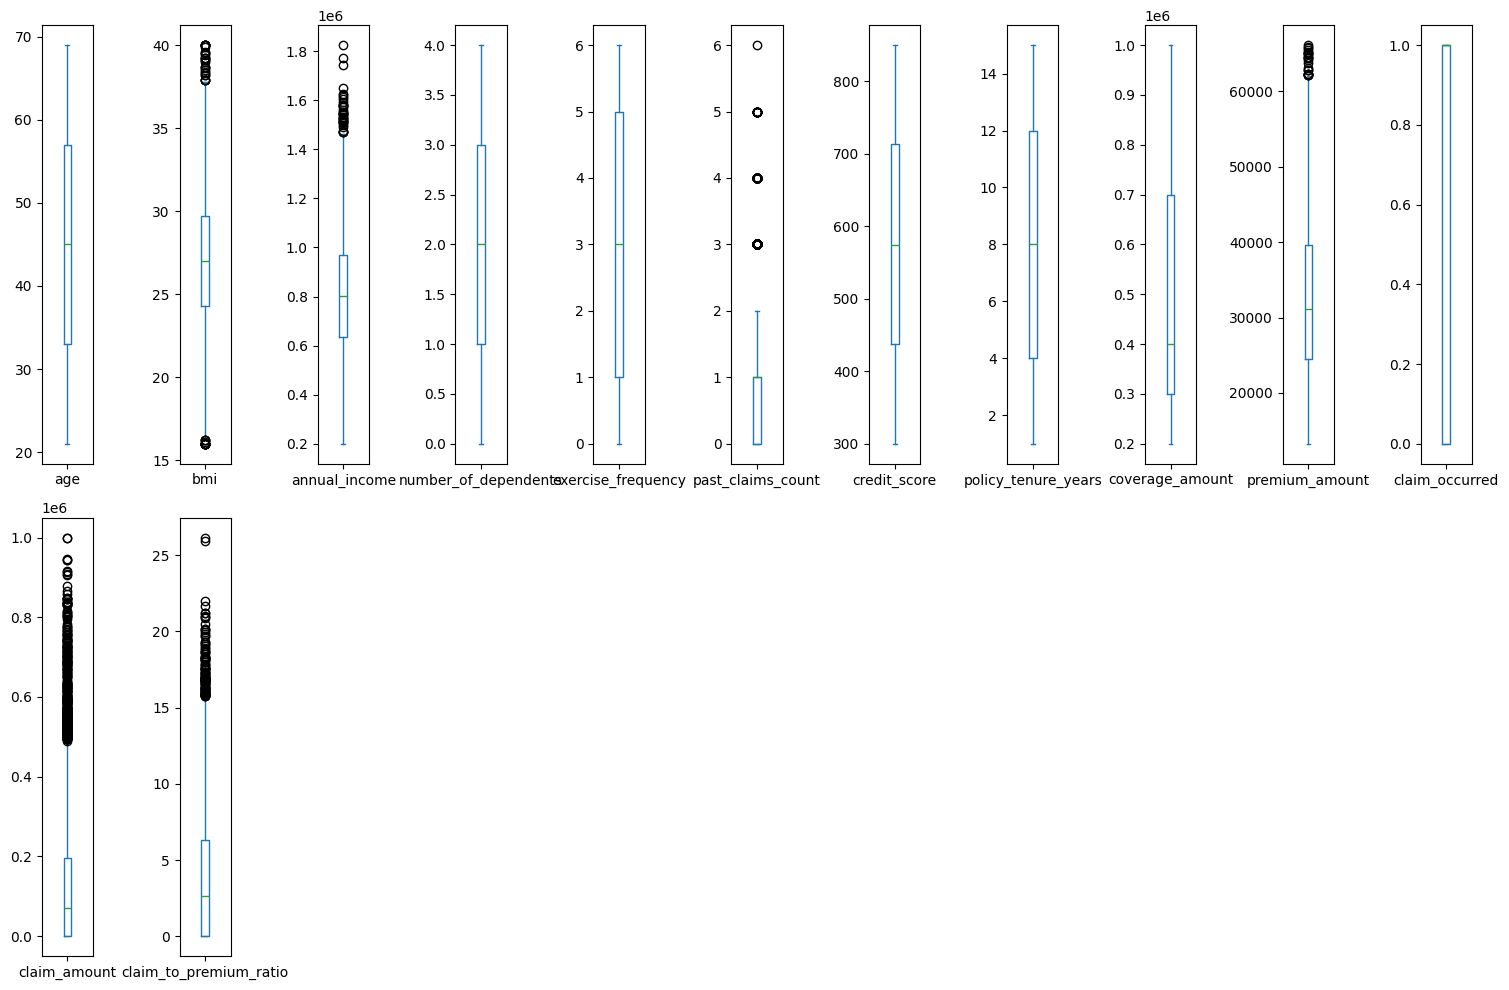

In [242]:
# Quick way to see all boxplots at once
df.plot(kind='box', subplots=True, layout=(2, len(df.columns)//2 + 1), 
        figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

 # Distribution analysis

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the insurance dataset
df = pd.read_csv('health_insurance_risk_dataset.csv')

# 2. Identify variable types for appropriate plotting
# Numerical: Continuous numbers | Categorical: Labels/Groups
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID from visualization as it's just a unique string
if 'policy_id' in cat_cols: cat_cols.remove('policy_id')

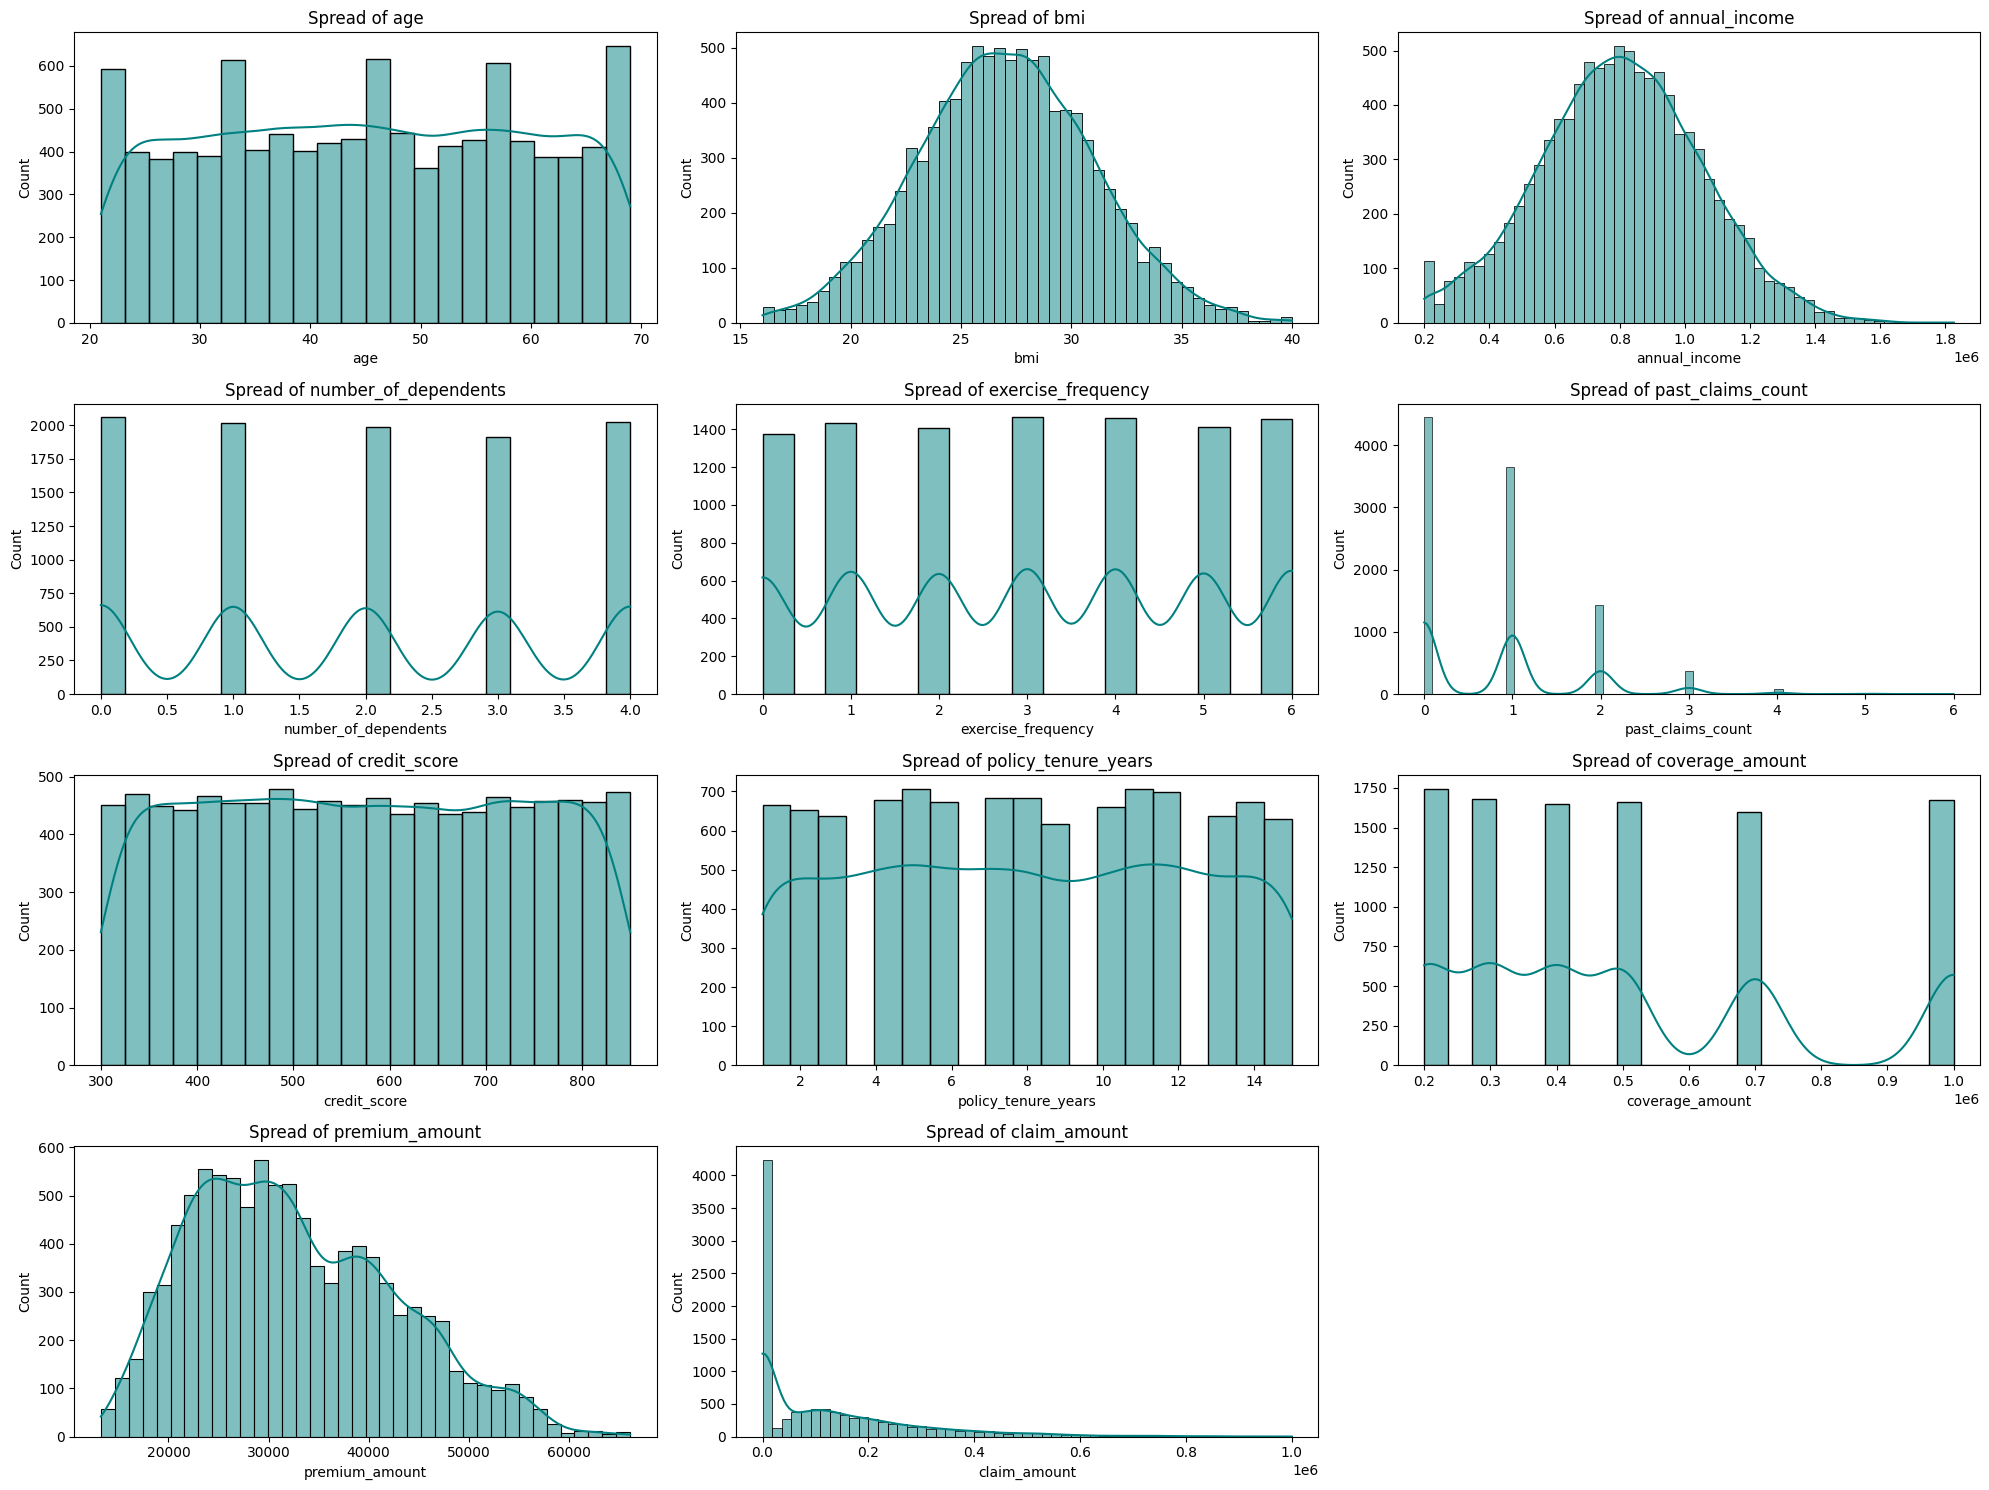

In [244]:
# --- PLOTTING NUMERICAL DISTRIBUTIONS ---
# We use Histograms with a KDE (Kernel Density Estimate) line to see the shape
num_to_plot = [c for c in num_cols if c not in ['claim_occurred']] 
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_to_plot):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Spread of {col}')
plt.tight_layout()
plt.show()

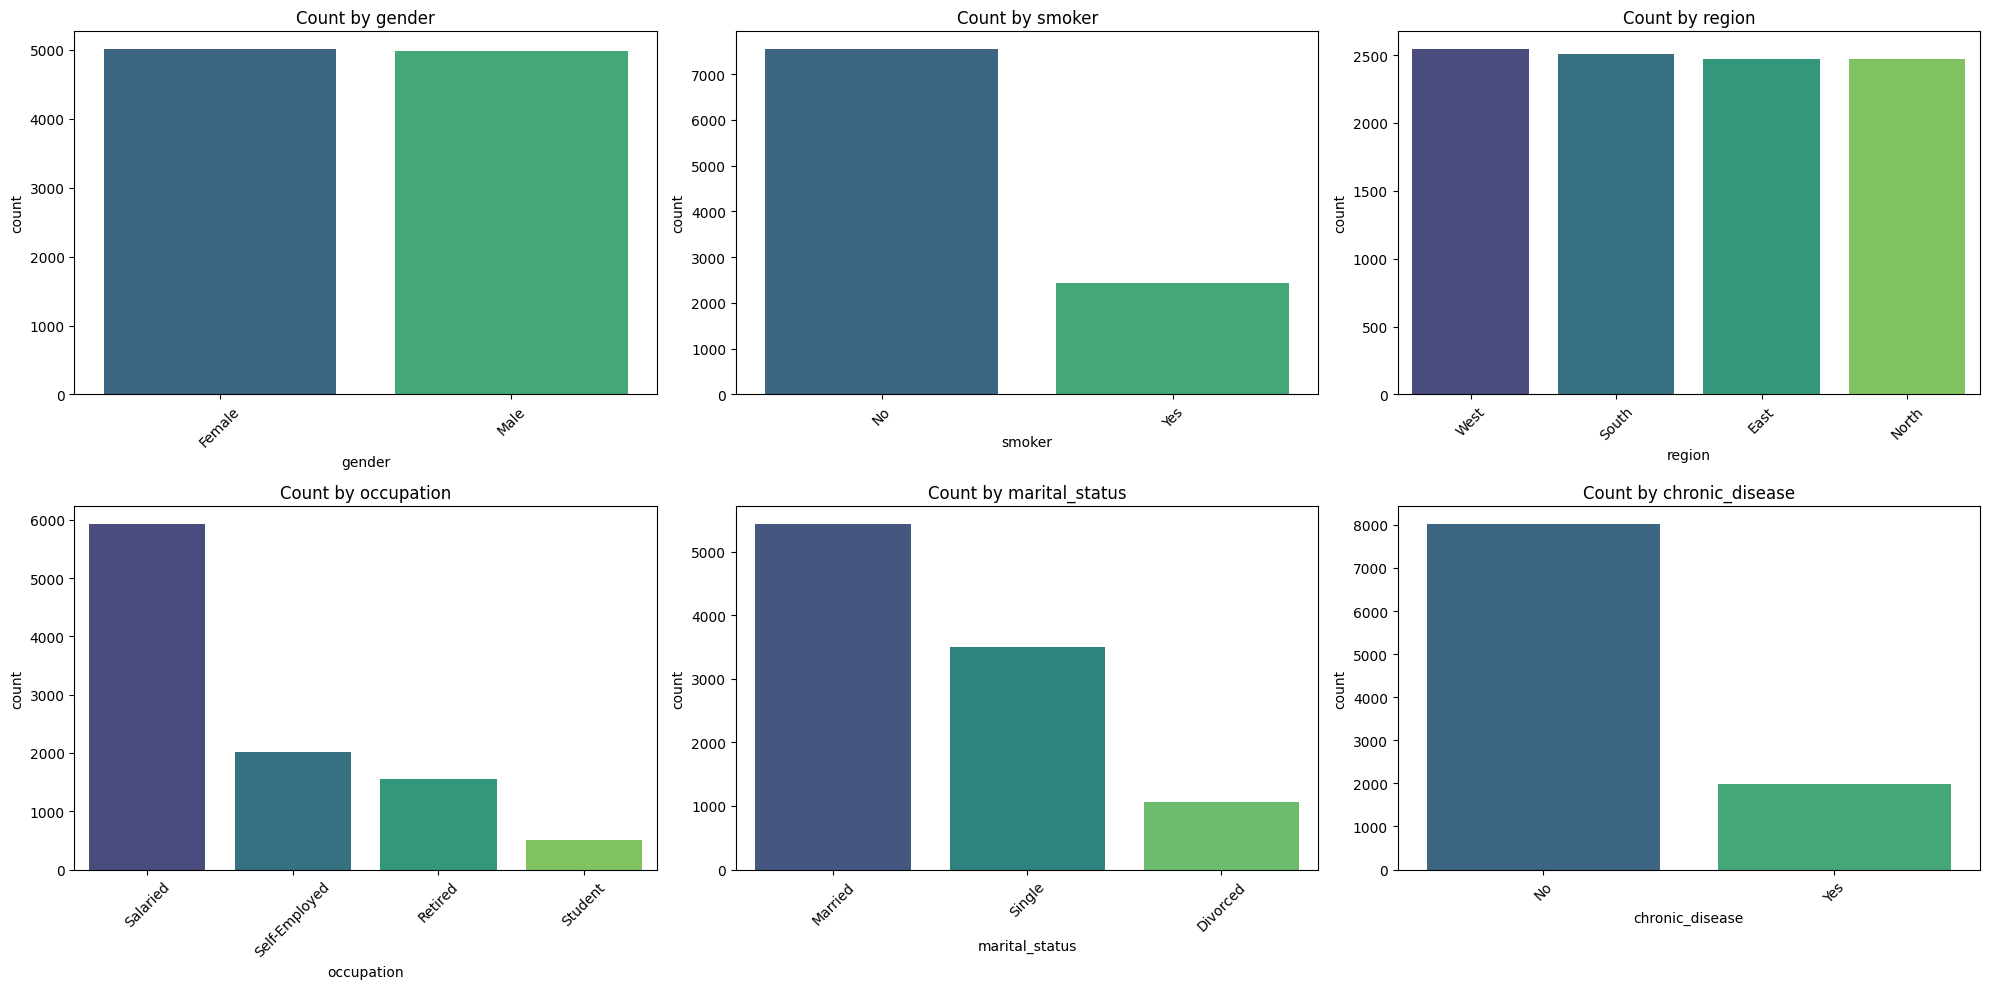

In [245]:
# --- PLOTTING CATEGORICAL FREQUENCIES ---
# We use CountPlots to see which groups are most frequent in the dataset
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    # Sort bars by frequency for better readability
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='viridis')
    plt.title(f'Count by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


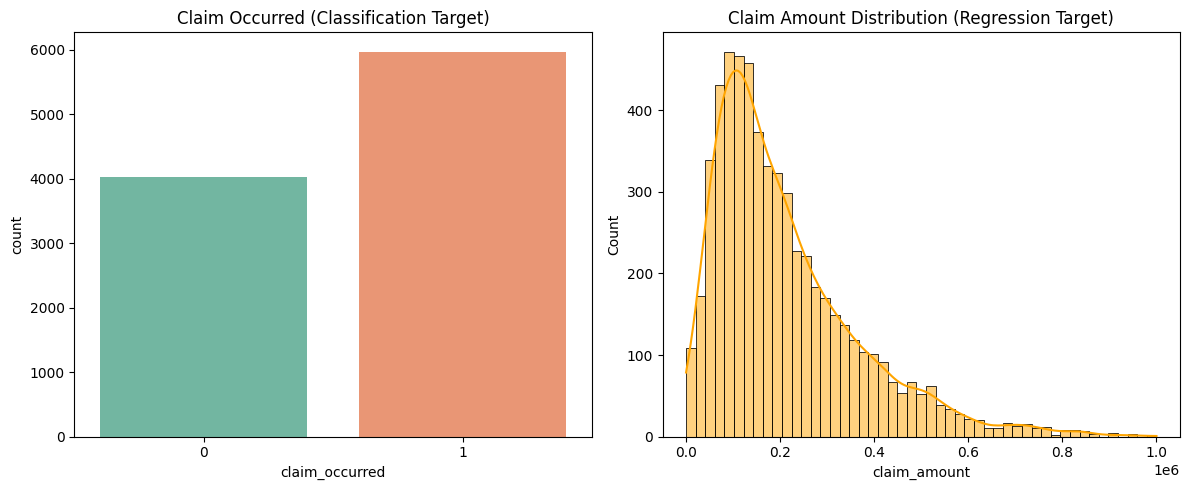

In [246]:
# --- TARGET VARIABLE ANALYSIS ---
plt.figure(figsize=(12, 5))

# A. Binary Target: Are the classes balanced? (0 vs 1)
plt.subplot(1, 2, 1)
sns.countplot(x='claim_occurred', data=df, palette='Set2')
plt.title('Claim Occurred (Classification Target)')

# B. Regression Target: What is the range of claim payouts?
# Note: We filter for > 0 to see the actual distribution of paid claims
plt.subplot(1, 2, 2)
sns.histplot(df[df['claim_amount'] > 0]['claim_amount'], kde=True, color='orange')
plt.title('Claim Amount Distribution (Regression Target)')

plt.tight_layout()
plt.show()

# Correlation Heatmap

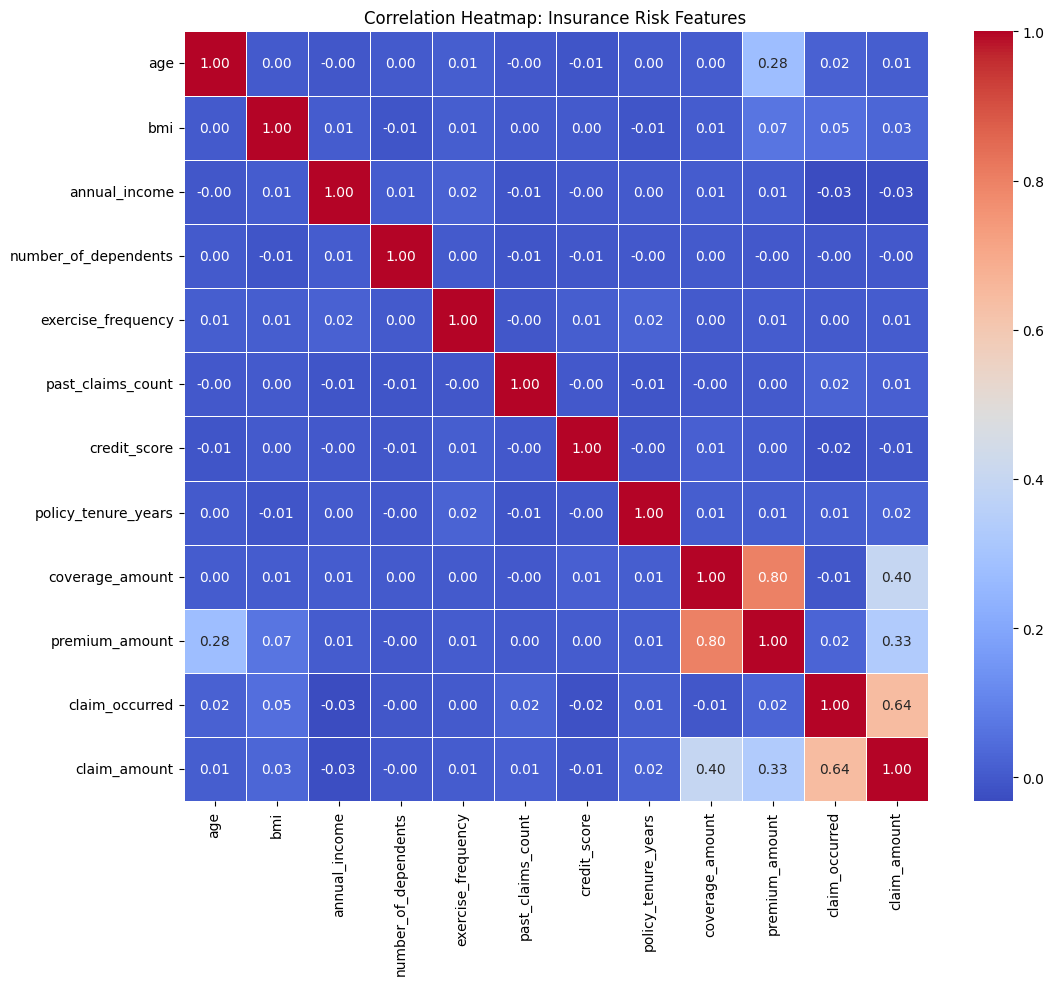

In [247]:
 
# (Correlation requires numbers; categorical columns like 'smoker' must be encoded first)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# 3. Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# 4. Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,       # Shows the correlation numbers in the boxes
            cmap='coolwarm',  # Color scale: Red (positive), Blue (negative)
            fmt='.2f',        # Rounds to 2 decimal places
            linewidths=0.5)

plt.title('Correlation Heatmap: Insurance Risk Features')
plt.show()

# Claim rate by: Age,Smoker,Chronic disease,Region.

### Claim rate by Age

In [211]:
# We don’t group by exact age (too many values).
# We create age groups (bins).

# Create age bins
df['age_group'] = pd.cut(df['age'],
                         bins=[18, 30, 40, 50, 60, 80],
                         labels=['18-30','30-40','40-50','50-60','60+'])

# Claim rate by age group
age_claim = df.groupby('age_group')['claim_occurred'].mean()
print(age_claim)

age_group
18-30    0.592762
30-40    0.586040
40-50    0.585830
50-60    0.603626
60+      0.621518
Name: claim_occurred, dtype: float64


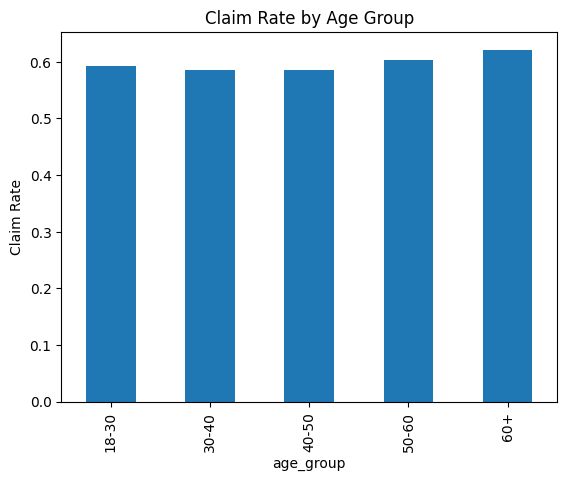

In [212]:
age_claim.plot(kind='bar', title="Claim Rate by Age Group")
plt.ylabel("Claim Rate")
plt.show()

### Claim rate by smoker

In [213]:
df.groupby('smoker')['claim_occurred'].mean()

smoker
No     0.589021
Yes    0.623361
Name: claim_occurred, dtype: float64

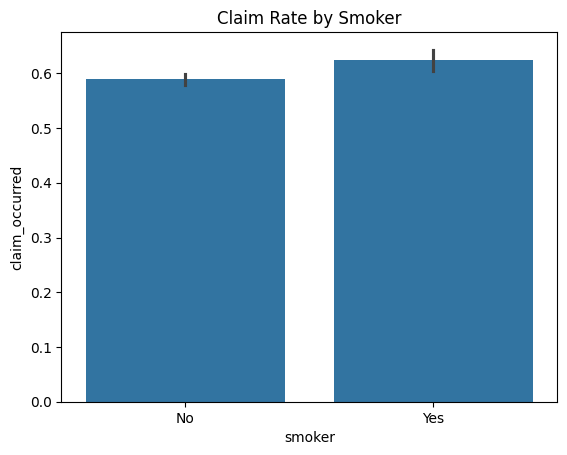

In [214]:
sns.barplot(x='smoker', y='claim_occurred', data=df)
plt.title("Claim Rate by Smoker")
plt.show()

### Claim rate by chronic disease

In [215]:
df.groupby('chronic_disease')['claim_occurred'].mean()

chronic_disease
No     0.590903
Yes    0.623797
Name: claim_occurred, dtype: float64

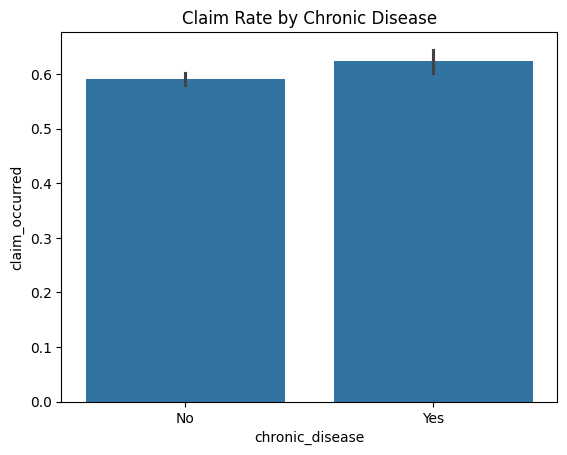

In [216]:
sns.barplot(x='chronic_disease', y='claim_occurred', data=df)
plt.title("Claim Rate by Chronic Disease")
plt.show()

### Claim rate by Regions

In [217]:
df.groupby('region')['claim_occurred'].mean()

region
East     0.593611
North    0.599272
South    0.590347
West     0.606203
Name: claim_occurred, dtype: float64

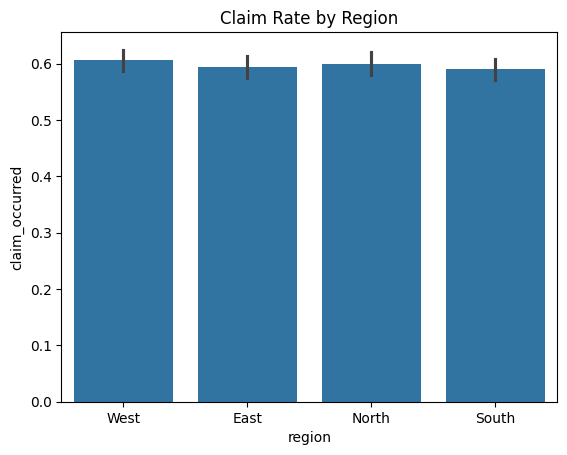

In [218]:
sns.barplot(x='region', y='claim_occurred', data=df)
plt.title("Claim Rate by Region")
plt.show()

# Premium vs Claim Amount Analysis

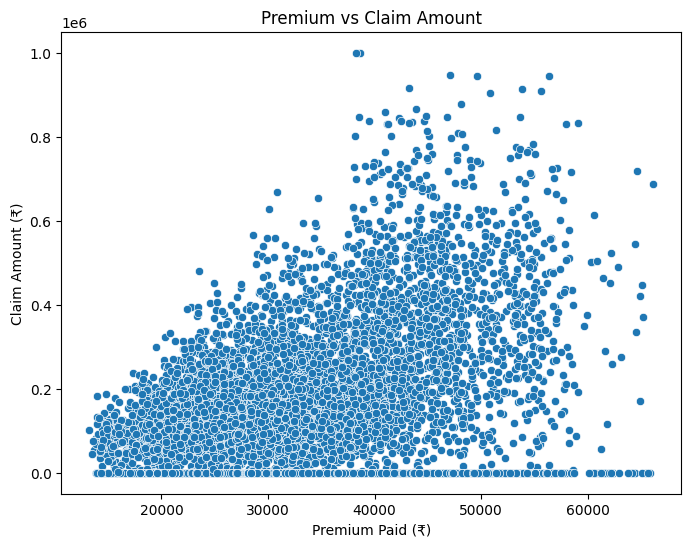

In [219]:
# Scatter plot to see relationship between premium and claim amount
plt.figure(figsize=(8,6))

# Each dot = one customer
sns.scatterplot(x='premium_amount', y='claim_amount', data=df)

# Title and labels
plt.title("Premium vs Claim Amount")
plt.xlabel("Premium Paid (₹)")
plt.ylabel("Claim Amount (₹)")
plt.show()
# Upward trend → good pricing
# Random scatter → weak relationship
# High claim with low premium → risky customers
# High premium but no claim → profitable customers

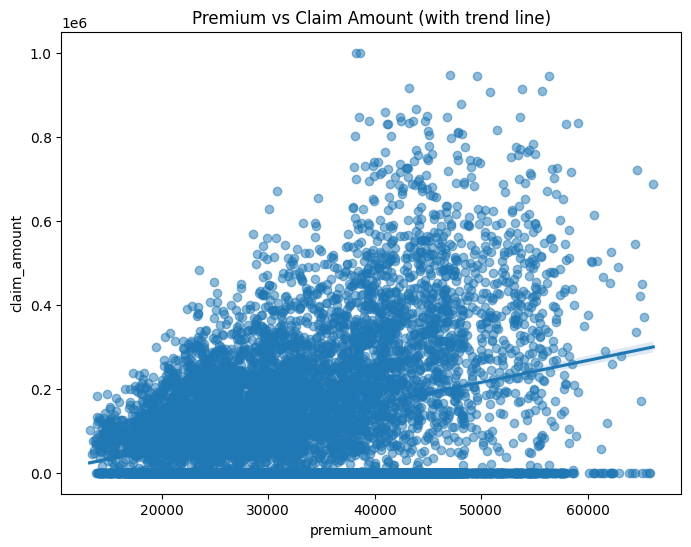

In [220]:
plt.figure(figsize=(8,6))

# regplot adds regression line
sns.regplot(x='premium_amount', y='claim_amount', data=df, scatter_kws={'alpha':0.5})

plt.title("Premium vs Claim Amount (with trend line)")
plt.show()

In [221]:
# Correlation tells strength of linear relationship
corr = df['premium_amount'].corr(df['claim_amount'])

print("Correlation between Premium and Claim:", corr)
# Interpretation
# Correlation	Meaning
# 0.0–0.2	Very weak
# 0.2–0.4	Moderate
# 0.4–0.6	Good
# 0.6+	Strong

Correlation between Premium and Claim: 0.33408185198236584


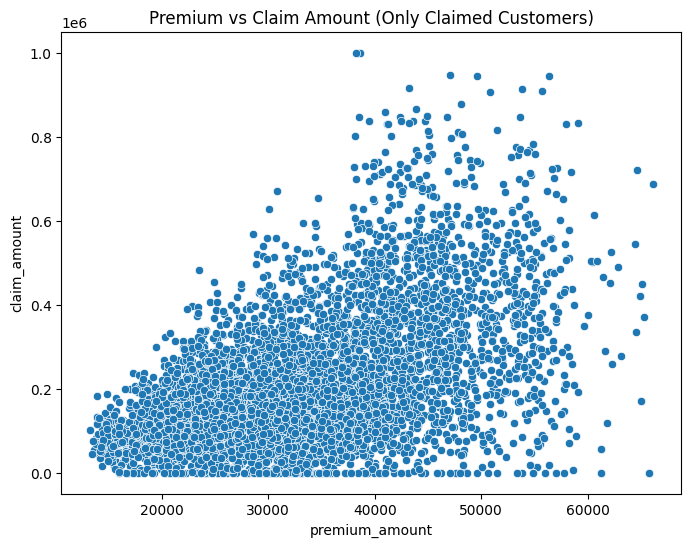

In [222]:
# Filter only customers who actually filed claims
claimed = df[df['claim_occurred'] == 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='premium_amount', y='claim_amount', data=claimed)
plt.title("Premium vs Claim Amount (Only Claimed Customers)")
plt.show()

In [223]:
# Claim to premium ratio
df['claim_to_premium_ratio'] = df['claim_amount'] / df['premium_amount']

# Replace inf values
df['claim_to_premium_ratio'] = df['claim_to_premium_ratio'].replace([float('inf')], 0)

df['claim_to_premium_ratio'].describe()

# If ratio > 1:
# 👉 Company is losing money on that customer

count    10000.000000
mean         3.671689
std          4.159272
min          0.000000
25%          0.000000
50%          2.632509
75%          6.294634
max         26.164312
Name: claim_to_premium_ratio, dtype: float64

In [224]:
# Customers where claim > premium
loss_customers = df[df['claim_amount'] > df['premium_amount']]

print("Customers causing loss:", len(loss_customers))

Customers causing loss: 5682


# Class imbalance detection

In [225]:
# Count number of 0 and 1
df['claim_occurred'].value_counts()

claim_occurred
1    5974
0    4026
Name: count, dtype: int64

In [226]:
# Percentage distribution
df['claim_occurred'].value_counts(normalize=True) * 100

claim_occurred
1    59.74
0    40.26
Name: proportion, dtype: float64

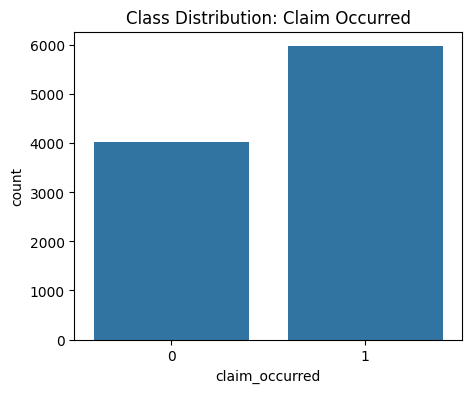

In [227]:
plt.figure(figsize=(5,4))
sns.countplot(x='claim_occurred', data=df)
plt.title("Class Distribution: Claim Occurred")
plt.show()
# Distribution	Meaning
# 50–50	Balanced
# 70–30	Slight imbalance
# 80–20	Imbalanced
# 90–10	Highly imbalanced

In [228]:
ratio = df['claim_occurred'].value_counts(normalize=True)

print(ratio)

if ratio[1] < 0.3:
    print("⚠️ Dataset is imbalanced")
else:
    print("✅ Dataset is fairly balanced")

claim_occurred
1    0.5974
0    0.4026
Name: proportion, dtype: float64
✅ Dataset is fairly balanced


# PART 2: Data Preprocessing


In [251]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['claim_occurred','claim_amount'])
y_class = df['claim_occurred']
y_reg = df['claim_amount']

X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [252]:
X

,age,gender,bmi,smoker,region,annual_income,occupation,marital_status,number_of_dependents,exercise_frequency,chronic_disease,past_claims_count,credit_score,policy_tenure_years,coverage_amount,premium_amount
0,59,Male,33.3,No,West,1080761,Salaried,Single,3,4,No,1,716,2,400000,28795
1,49,Female,26.1,Yes,West,865752,Salaried,Single,4,6,Yes,2,522,11,200000,37715
2,35,Male,20.9,No,East,787147,Salaried,Single,0,6,No,0,708,10,500000,25135
3,63,Female,27.5,No,North,1081382,Salaried,Married,2,4,No,2,756,9,200000,22725
4,28,Male,26.5,No,East,955093,Salaried,Single,4,6,No,0,323,6,400000,21575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,53,Female,28.1,No,West,596573,Student,Married,4,4,No,1,361,2,500000,29815
9996,21,Male,25.6,No,East,926145,Retired,Single,0,1,No,1,338,6,300000,17040
9997,33,Male,24.5,Yes,West,720922,Self-Employed,Single,1,3,Yes,0,628,5,1000000,58275
9998,57,Male,30.2,No,North,868897,Self-Employed,Married,1,0,No,0,456,13,300000,24930


## Handling outliers

In [253]:
import numpy as np

num_cols = X_train.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    X_train[col] = np.clip(X_train[col], lower, upper)
    X_test[col] = np.clip(X_test[col], lower, upper)

## Encoding

In [254]:
#one-hot encoding
X_train = pd.get_dummies(X_train, columns=['region','marital_status','occupation'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['region','marital_status','occupation'], drop_first=True)

# align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [255]:
#label encoding
binary_cols = ['gender','smoker','chronic_disease']

for col in binary_cols:
    X_train[col] = X_train[col].map({'Yes':1,'No':0,'Male':1,'Female':0})
    X_test[col] = X_test[col].map({'Yes':1,'No':0,'Male':1,'Female':0})

## Scaling

In [256]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Class Imbalance

In [257]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train_class = smote.fit_resample(X_train, y_train_class)